In [54]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#!pip install word2number

In [15]:
from word2number import w2n

In [67]:
#generate_lists

def generate_lists(file_name):
    
    #in each line of txt file, find = and split the line into that many parts
    #take the first part and append to list after converting word to num
    #take part after last = and append to list after converting predicted num
    #return both lists
    
    with open(file_name, 'r') as f:
        lines = f.readlines()
        actual = []
        predicted = []
        for line in lines:
            parts = line.split('=')
            
            try:
                float(parts[-1].strip().replace(',', ''))
                predicted.append(parts[-1].strip().replace(',', ''))
            
                actual.append(parts[0].strip().replace(',', ''))
                
                
            except:
                print('Error in line: ', line)
            
            
    return actual, predicted


generate_lists('word2num_neg_int.txt')

Error in line:  minus nine thousand, six hundred and forty-five =  answer = -96 plots 



(['zero',
  'minus one',
  'minus two',
  'minus three',
  'minus four',
  'minus five',
  'minus six',
  'minus seven',
  'minus eight',
  'minus nine',
  'minus ten',
  'minus eleven',
  'minus twelve',
  'minus thirteen',
  'minus fourteen',
  'minus fifteen',
  'minus sixteen',
  'minus seventeen',
  'minus eighteen',
  'minus nineteen',
  'minus twenty',
  'minus twenty-one',
  'minus twenty-two',
  'minus twenty-three',
  'minus twenty-four',
  'minus twenty-five',
  'minus twenty-six',
  'minus twenty-seven',
  'minus twenty-eight',
  'minus twenty-nine',
  'minus thirty',
  'minus thirty-one',
  'minus thirty-two',
  'minus thirty-three',
  'minus thirty-four',
  'minus thirty-five',
  'minus thirty-six',
  'minus thirty-seven',
  'minus thirty-eight',
  'minus thirty-nine',
  'minus forty',
  'minus forty-one',
  'minus forty-two',
  'minus forty-three',
  'minus forty-four',
  'minus forty-five',
  'minus forty-six',
  'minus forty-seven',
  'minus forty-eight',
  'minus fort

In [91]:
def num_digits(num):
    return len(str(num).split('.')[0].replace('-','').replace(',',''))  

def is_correct(string,num):
    '''
    string: the word form of the number (str)
    num: the number form of the number (int/float)
    '''
    # remove commas from the string
    string = string.replace(',','')
    # get sign of the number
    sign = string.startswith('minus')
    # convert the number
    converted = ((-1)**sign)* w2n.word_to_num(string)
    
    num=num.replace(',','')
    #convert to float 
    num = float(num)

    return abs(converted - num) < 1e-8

def string_to_num(string):
    # remove commas from the string
    string = string.replace(',','')
    # get sign of the number
    sign = string.startswith('minus')
    # convert the number
    return ((-1)**sign)* w2n.word_to_num(string)

In [92]:
actual_pos_int, predicted_pos_int = generate_lists('word2num_pos_int.txt')

Error in line:  four hundred and ninety-seven =  answer = Paintballs(497) 

Error in line:  seventy-nine thousand and seventeen =  answer = ? 

Error in line:  forty-nine thousand and fifty-seven =  What is forty-nine?

Error in line:  seventy-seven thousand and seventy-six =  What is seventy-seven?

Error in line:  fifty-seven thousand and one =  answer = ? 

Error in line:  eighty thousand, seven hundred and fifty-eight =  answer = 800758 

Error in line:  four hundred and forty-nine thousand, three hundred and seventy-nine =  answer = ? 

Error in line:  three hundred and seventy-seven thousand, seven hundred and five =  answer = ? 

Error in line:  eight hundred and fifteen thousand, four hundred and ninety-seven =  answer = ? 

Error in line:  seven hundred and forty-seven thousand and thirty-seven =  answer = ? 

Error in line:  three hundred and twenty-eight thousand, eight hundred and six =  What is three hundred and twenty-eight?

Error in line:  three hundred and seventeen t

In [93]:
actual_neg_int, predicted_neg_int = generate_lists('word2num_neg_int.txt')

Error in line:  minus nine thousand, six hundred and forty-five =  answer = -96 plots 



In [94]:
actual_pos_dec, predicted_pos_dec = generate_lists('word2num_pos_dec.txt')


Error in line:  six hundred and twenty-seven point nine one =  answer = ? 

Error in line:  six hundred and fourteen point eight four =  answer = ? 

Error in line:  four hundred and sixteen point nine one =  answer = ? 

Error in line:  three hundred and forty-four point seven two =  answer = ? 

Error in line:  seven hundred and fifteen point seven one =  answer = ? 

Error in line:  three hundred and fifty-seven point seven four =  answer = ? 

Error in line:  seven hundred and forty-seven point eight =  answer = ? 

Error in line:  four thousand, one hundred and sixty-four point five nine =  answer = ? 

Error in line:  one thousand, four hundred and thirty-two point seven one =  answer = ? 

Error in line:  three thousand, five hundred and seventeen point six seven =  answer = ? 

Error in line:  one thousand, five hundred and seventy-eight point six four =  answer = ? 

Error in line:  six thousand, seven hundred and sixty-seven point five seven =  answer = ? 

Error in line:  se

In [95]:
actual_neg_dec, predicted_neg_dec = generate_lists('word2num_neg_dec.txt')

In [106]:
MAX_DIGITS = 7

total = np.zeros((4,MAX_DIGITS))
correct = np.zeros((4,MAX_DIGITS))

#for pos int
for i in range(len(actual_pos_int)):
    true_num=string_to_num(actual_pos_int[i])
    if num_digits(true_num)<=MAX_DIGITS:
        total[0][num_digits(true_num)-1] += 1
        if is_correct(actual_pos_int[i],predicted_pos_int[i]):
            correct[0][num_digits(true_num)-1] += 1
            
#for neg int
for i in range(len(actual_neg_int)):
    true_num=string_to_num(actual_neg_int[i])
    if num_digits(true_num)<=MAX_DIGITS:
        total[1][num_digits(true_num)-1] += 1
        if is_correct(actual_neg_int[i],predicted_neg_int[i]):
            correct[1][num_digits(true_num)-1] += 1
            
#for pos dec
for i in range(len(actual_pos_dec)):
    true_num=string_to_num(actual_pos_dec[i])
    if num_digits(true_num)<=MAX_DIGITS:
        total[2][num_digits(true_num)-1] += 1
        if is_correct(actual_pos_dec[i],predicted_pos_dec[i]):
            correct[2][num_digits(true_num)-1] += 1
            
#for neg dec
for i in range(len(actual_neg_dec)):
    true_num=string_to_num(actual_neg_dec[i])
    if num_digits(true_num)<=MAX_DIGITS:
        total[3][num_digits(true_num)-1] += 1
        if is_correct(actual_neg_dec[i],predicted_neg_dec[i]):
            correct[3][num_digits(true_num)-1] += 1
                        
                        
print('Total:\n',total)
print('=========================================')
print('Correct:\n',correct)

Total:
 [[ 10.  90. 199. 199. 196. 139. 192.]
 [ 10.  90. 200. 199. 200. 200. 200.]
 [200. 200. 193. 162.  74.  50. 136.]
 [200. 200. 200. 200. 200. 200. 200.]]
Correct:
 [[ 10.  90. 195. 176. 122.  90.  87.]
 [ 10.  90. 200. 182. 128. 151.  79.]
 [198. 192. 186. 131.  46.  34.  61.]
 [200. 200. 194. 136. 134. 143. 113.]]


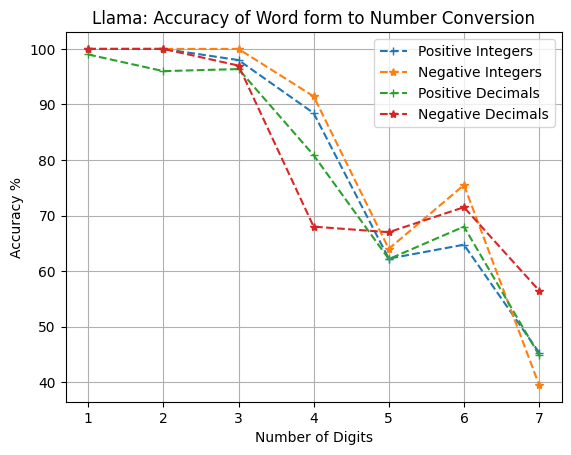

In [108]:
#print len of both lists
accuracy = correct*100/total

# plot the accuracy
plt.plot(range(1,MAX_DIGITS+1),accuracy[0,:],marker='+',linestyle='--',label='Positive Integers')
plt.plot(range(1,MAX_DIGITS+1),accuracy[1,:],marker='*',linestyle='--',label='Negative Integers')
plt.plot(range(1,MAX_DIGITS+1),accuracy[2,:],marker='+',linestyle='--',label='Positive Decimals')
plt.plot(range(1,MAX_DIGITS+1),accuracy[3,:],marker='*',linestyle='--',label='Negative Decimals')
plt.xlabel('Number of Digits')
plt.ylabel('Accuracy %')
plt.title('Llama: Accuracy of Word form to Number Conversion')
plt.legend()
plt.grid()
plt.show()